# Heston Model

https://en.wikipedia.org/wiki/Heston_model

[*********************100%***********************]  1 of 1 completed


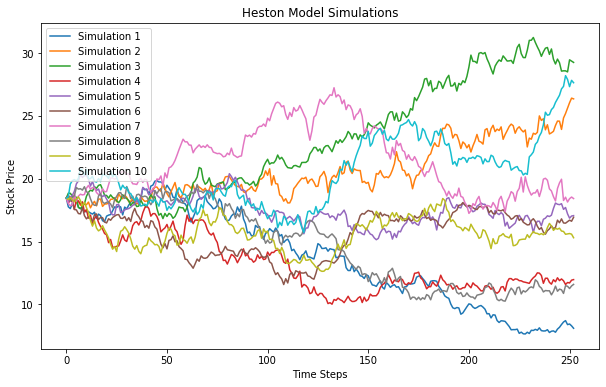

In [1]:
import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the Heston model parameters
def heston_model(S0, T, r, kappa, theta, sigma, rho, V0, n_sim, n_steps):
    dt = T / n_steps
    sqrt_dt = np.sqrt(dt)
    
    stock_prices = np.zeros((n_sim, n_steps + 1))
    volatility = np.zeros((n_sim, n_steps + 1))
    
    for i in range(n_sim):
        stock_prices[i, 0] = S0
        volatility[i, 0] = V0
        
        for t in range(1, n_steps + 1):
            z1 = np.random.randn()
            z2 = rho * z1 + np.sqrt(1 - rho**2) * np.random.randn()
            
            stock_prices[i, t] = stock_prices[i, t - 1] * np.exp((r - 0.5 * volatility[i, t - 1]**2) * dt +
                                       np.sqrt(volatility[i, t - 1] * dt) * z1)
            
            volatility[i, t] = np.abs(volatility[i, t - 1] + kappa * (theta - volatility[i, t - 1]) * dt +
                                 sigma * np.sqrt(volatility[i, t - 1] * dt) * z2)
    
    return stock_prices, volatility

# Input
symbol = 'AMD'
start = '2014-01-01'
end = '2019-01-01'

# Read data 
dataset = yf.download(symbol,start,end)

# Prepare data
data = dataset['Adj Close']
returns = data.pct_change().dropna()

# Set initial parameters
S0 = data.iloc[-1]  # Current stock price
T = 1.0  # Time to maturity
r = 0.05  # Risk-free rate
kappa = 2.0  # Mean reversion speed
theta = 0.1  # Long-term volatility
sigma = 0.3  # Volatility of volatility
rho = -0.5  # Correlation between stock price and volatility
V0 = 0.1  # Initial volatility
n_sim = 10  # Number of simulations
n_steps = 252  # Number of time steps

# Simulate Heston model
stock_prices, volatility = heston_model(S0, T, r, kappa, theta, sigma, rho, V0, n_sim, n_steps)

# Plotting results
plt.figure(figsize=(10, 6))
for i in range(n_sim):
    plt.plot(stock_prices[i], label=f"Simulation {i+1}")

plt.title('Heston Model Simulations')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()